### <center>San Jose State University<br>Department of Applied Data Science<br><br>**DATA 200<br>Computational Programming for Data Analytics**<br><br>Spring 2024<br>Instructor: Ron Mak</center>

# Matrix Operations with `numpy`

## Buying fruit

#### Suppose you want to buy a number of apples, bananas, and oranges.
| Fruit | Number |
| :--:  | :--:   |
| Apples | 6 |
| Bananas | 3 |
| Oranges | 10 |
#### Two stores, A and B, sell individual fruits at different prices:
| Store | Apples | Bananas | Oranges |
| :--:  | :--:   | :--:  | :--:   |
| **A** | 0.10 | 0.40 | 0.10 |
| **B** | 0.15 | 0.30 | 0.20 |
#### What is the total purchase price at each store?

In [ ]:
store_A_total = 6*0.10 + 3*0.40 + 10*0.10
store_B_total = 6*0.15 + 3*0.30 + 10*0.20

print(f'(Store A total = ${store_A_total:.2f}')
print(f'(Store B total = ${store_B_total:.2f}')

In [ ]:
import numpy as np

#### Mathematicians call a 2-d array a **matrix** and a 1-d array a **vector**.

#### We can represent the store prices as a matrix and the numbers of fruits as a vector. Using numpy, a matrix is a 2-d array and a vector is a 1-d array. But we want the fruit numbers in a **column vector**, which in `numpy` is a 2-d array with only one element in each row.

In [ ]:
prices = np.array([[0.10, 0.40, 0.10],
                   [0.15, 0.30, 0.20]])

fruits = np.array([[ 6],
                   [ 3],
                   [10]]) 

#### When we **sum the products** of corresponding elements of two vectors, we are creating what mathematicians call a **dot product**. Therefore, to get the store totals, we calculated two dot products:
- Dot product 1: First row of the prices matrix and the fruits vector.
- Dot product 2: Second row of the prices matrix and the fruits vector.
#### A dot product is always a scalar (a single value, not a vector or matrix).

#### We can use **matrix multiplication** to calculate the store totals:
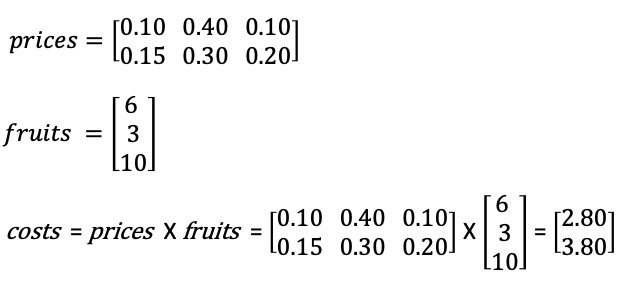

## Explicit dot product calculation

In [ ]:
def AX_explicit(A, X):
    """
    Multiply matrix A by column vector X 
    and return the result as a column vector.
    Explicitly calculate the dot products.
    Assume that the number of columns of A
    is equal to the number of elements of X.
    """
    row_count, col_count = A.shape
    
    y = []  # the result
    
    for i in range(row_count):
        dot_product = 0
        
        # Calculate the dot product of a row of A
        # and vector X. The result is an element of y.
        for j in range(col_count):
            dot_product += A[i][j]*X[j]
            
        y.append(dot_product)
        
    return np.array(y)

In [ ]:
costs = AX_explicit(prices, fruits)
costs

In [ ]:
print(f'(Store A total = ${costs[0][0]:.2f}')
print(f'(Store B total = ${costs[1][0]:.2f}')

## `np.dot()` function

In [ ]:
def AX_dot_product(A, X):
    """
    Multiply matrix A by column vector X 
    and return the result as a column vector.
    Let numpy calculate the dot products.
    Assume that the number of columns of A
    is equal to the number of elements of X.
    """
    rows_A = A[:, 0].size  # size of first column
    
    y = []  # the result
    
    for row in A:
        dot_product = np.dot(row, X)  # or simply: row@X
        y.append(dot_product)
        
    return np.array(y)

In [ ]:
costs = AX_dot_product(prices, fruits)
costs

In [ ]:
print(f'(Store A total = ${costs[0][0]:.2f}')
print(f'(Store B total = ${costs[1][0]:.2f}')

## Matrix multiplication with `@`

In [ ]:
costs = prices@fruits
costs

In [ ]:
print(f'(Store A total = ${costs[0][0]:.2f}')
print(f'(Store B total = ${costs[1][0]:.2f}')

## Hilbert matrices

#### A Hilbert matrix *H*<sub>*n*</sub> is an *n*-by-*n* square matrix where each element `h[i,j] = 1/(i+j+1)`.

In [ ]:
N = 5

In [ ]:
H = np.array( [[1.0/(i+j+1) for i in range(N)] for j in range(N)] )
H

#### Hilbert matrices are prominent in linear algebra, so the `scipy.linalg` module has a `hilbert()` function:

In [ ]:
from scipy.linalg import hilbert

H = hilbert(N)
H

#### Module `scipy.linalg` has a function that calculates the inverse of a matrix.

In [ ]:
from scipy.linalg import inv

H_inv = inv(H)
H_inv

#### An *n*-by-*n* square matrix *A*<sub>*n*</sub> multiplied by its inverse *A*<sub>*n*</sub><sup>-1</sup> results in the identity matrix *I*<sub>*n*</sub> which is a square matrix with ones along the diagonal and zeros elsewhere.|

In [ ]:
I = H@H_inv

for row in I:
    for elmt in row:
        print(f'{elmt:4.0f}', end='')
    print()

#### The identity matrix times a square matrix of the same size results in the square matrix.

In [ ]:
H

In [ ]:
I@H

## Solving systems of linear equations

#### Recall this terror from high-school algebra! Solve this system of linear equations for `x`, `y`, and `z`:
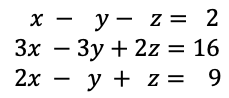

#### Represent the problem as matrix multiplication. First, we define the matrix `A` and the vectors `X` and `Y`:
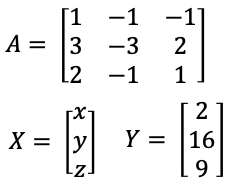

In [ ]:
A = np.array([[1, -1, -1],
              [3, -3,  2],
              [2, -1,  1]])

Y = np.array([[ 2],
              [16],
              [9]])

#### Then our system of linear equations becomes:
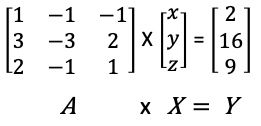

#### To solve for `X`, multipy both sides of the equation by the inverse of matrix `A`. Then `A` disappears from the left side and the inverse appears on the right side since *A*x*A*<sup>-1</sup> = *I*, and *I*x*X* = *X*:
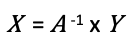

In [ ]:
A_inv = inv(np.array(A))
A_inv

#### Now we can calculate vector `X` which solves for `x`, `y`, and `z`.

In [ ]:
X = A_inv@Y
X

In [ ]:
print(f'x = {X[0][0]:4.1f}')
print(f'y = {X[1][0]:4.1f}')
print(f'z = {X[2][0]:4.1f}')

#### We can use function `solve()` from `scipy.linalg` which solves systems of linear equations.

In [ ]:
from scipy.linalg import solve

X = solve(A, Y)
X

#### Check our answers:

In [ ]:
Y

In [ ]:
A@X

In [ ]:
# (C) Copyright 2024 by Ronald Mak